In [16]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from explore.gcp.storage import gcp
from explore.src.utilities.eda_funcs import describe_data
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.stats_visual import StatsVisuals

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [17]:
df = gcp.read_df_from_bucket(bucket_name="processed_fbref_db", blob_name="processed_keeper.csv")

[03/21/24 18:36:27] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=559941;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=988944;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=601472;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=852505;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [18]:
df.head()

,rk,player,nation,pos,squad,comp,age,born,mp,starts,min,90s,goals_against,ga_per_90,shots_on_target_against,saves,save_pct,wins,draws,losses,clean_sheets,clean_sheet_pct,penalties_faced,penalties_allowed,penalties_saved,pkm,penalty_save_pct,season,general_pos,age_range,country,continent,player_id
0,1,Antonio Adán,ESP,GK,Betis,La Liga,30,1987,30,30,2700.0,30.0,53.0,1.77,132.0,82.0,62.1,14.0,4.0,12.0,9.0,30.0,4.0,3.0,1.0,0.0,25.0,2017-2018,Goalkeeper,30-34,Spain,Europe,13
1,2,René Adler,GER,GK,Mainz 05,Bundesliga,32,1985,14,14,1260.0,14.0,18.0,1.29,53.0,35.0,67.9,5.0,3.0,6.0,4.0,28.6,2.0,1.0,0.0,1.0,0.0,2017-2018,Goalkeeper,30-34,Germany,Europe,17
2,3,Adrián,ESP,GK,West Ham,Premier League,30,1987,19,19,1710.0,19.0,29.0,1.53,96.0,68.0,70.8,7.0,6.0,6.0,6.0,31.6,1.0,1.0,0.0,0.0,0.0,2017-2018,Goalkeeper,30-34,Spain,Europe,20
3,4,Alisson,BRA,GK,Roma,Serie A,24,1992,37,37,3330.0,37.0,28.0,0.76,135.0,105.0,81.5,22.0,8.0,7.0,17.0,45.9,5.0,3.0,2.0,0.0,40.0,2017-2018,Goalkeeper,20-24,Brazil,South America,58
4,5,Sergio Álvarez,ESP,GK,Celta Vigo,La Liga,30,1986,17,16,1475.0,16.4,29.0,1.77,75.0,47.0,62.7,3.0,6.0,7.0,3.0,18.8,1.0,1.0,0.0,0.0,0.0,2017-2018,Goalkeeper,30-34,Spain,Europe,66


In [19]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
rk,int64,0,0.00,218,1.0,218.0,101.00,101.51,59.21,0,0.00
age,int64,0,0.00,26,17.0,42.0,28.00,28.08,4.79,4,0.29
born,int64,0,0.00,29,1977.0,2005.0,1992.00,1991.54,5.04,1,0.07
mp,int64,0,0.00,38,1.0,38.0,15.00,16.91,13.56,0,0.00
starts,int64,0,0.00,39,0.0,38.0,15.00,16.72,13.68,0,0.00
min,float64,3,0.21,387,1.0,3420.0,1350.00,1507.37,1223.77,0,0.00
90s,float64,0,0.00,239,0.0,38.0,15.00,16.76,13.59,0,0.00
goals_against,float64,5,0.36,78,0.0,91.0,21.00,23.27,19.31,1,0.07
ga_per_90,float64,7,0.50,226,0.0,22.5,1.41,1.55,1.20,76,5.42
shots_on_target_against,float64,3,0.21,205,0.0,234.0,62.00,71.36,59.22,0,0.00


## Statistical Plots

In [21]:
stat_plots = StatisticPlots(df)

In [22]:
df.columns

Index(['rk', 'player', 'nation', 'pos', 'squad', 'comp', 'age', 'born', 'mp',
       'starts', 'min', '90s', 'goals_against', 'ga_per_90',
       'shots_on_target_against', 'saves', 'save_pct', 'wins', 'draws',
       'losses', 'clean_sheets', 'clean_sheet_pct', 'penalties_faced',
       'penalties_allowed', 'penalties_saved', 'pkm', 'penalty_save_pct',
       'season', 'general_pos', 'age_range', 'country', 'continent',
       'player_id'],
      dtype='object')

In [23]:
cols = df.columns[12:-5].tolist() + ['comp', 'age_range', 'continent']

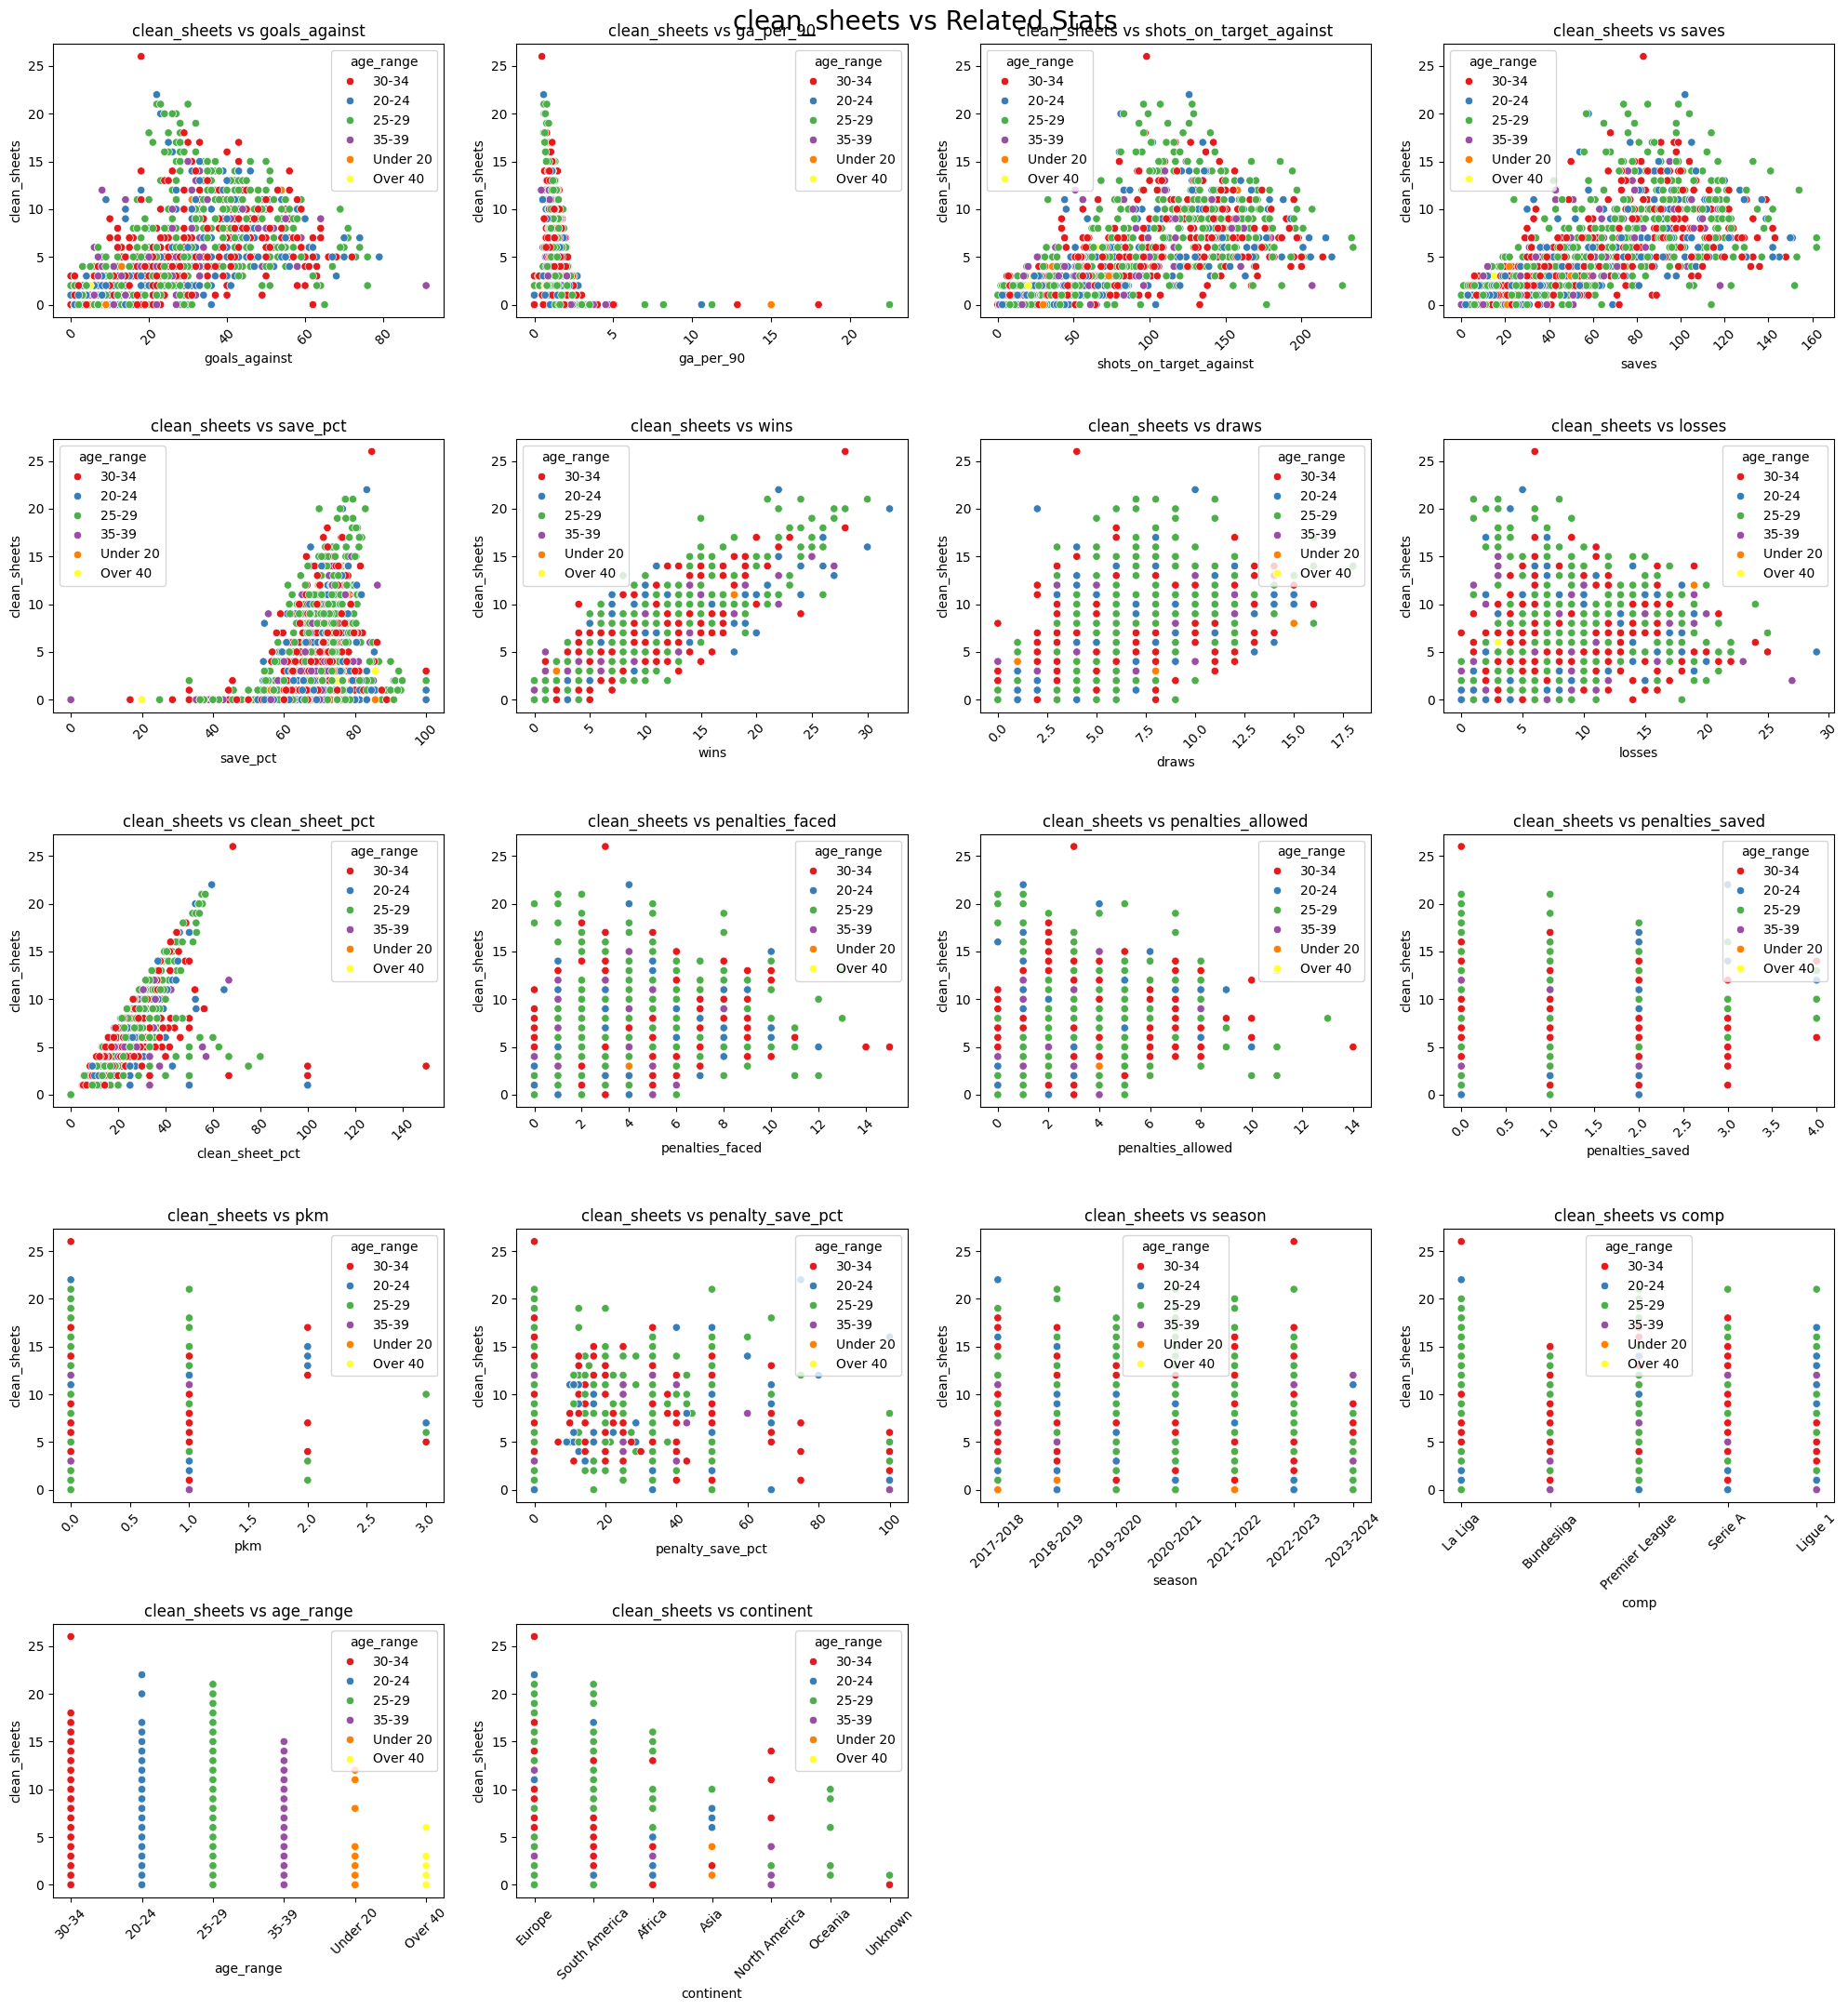

In [24]:
stat_plots.relationships(y='clean_sheets', X=cols, nrows=5, figsize=(20, 22), hue='age_range', palette='Set1')

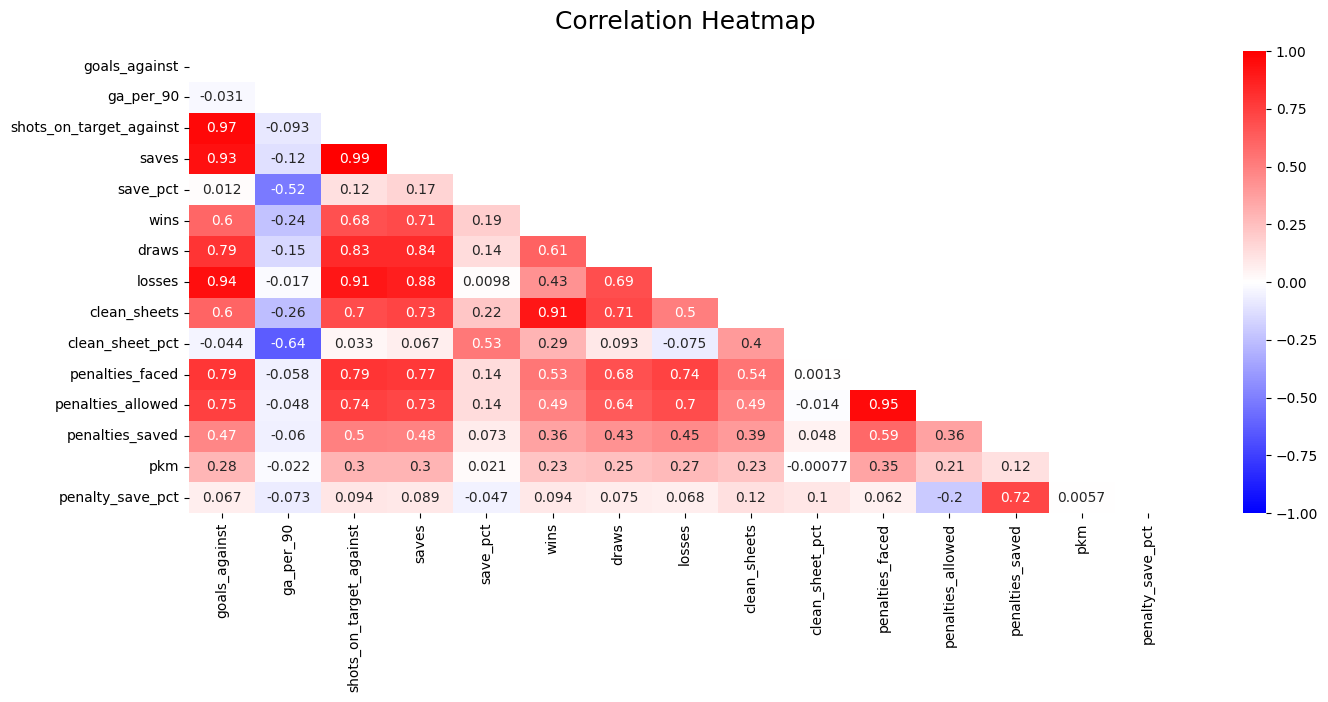

In [25]:
stat_plots.correlation_matrix(cols)

In [26]:
# filter out 2023-24 season and filter for players with more than 20 starts
data = df.loc[(df['season'] != '2023-2024') & (df['starts'] >= 20)]

In [27]:
keeper_plots = StatsVisuals(data.reset_index(drop=True))

In [28]:
cols = data.columns[12:-6].tolist()

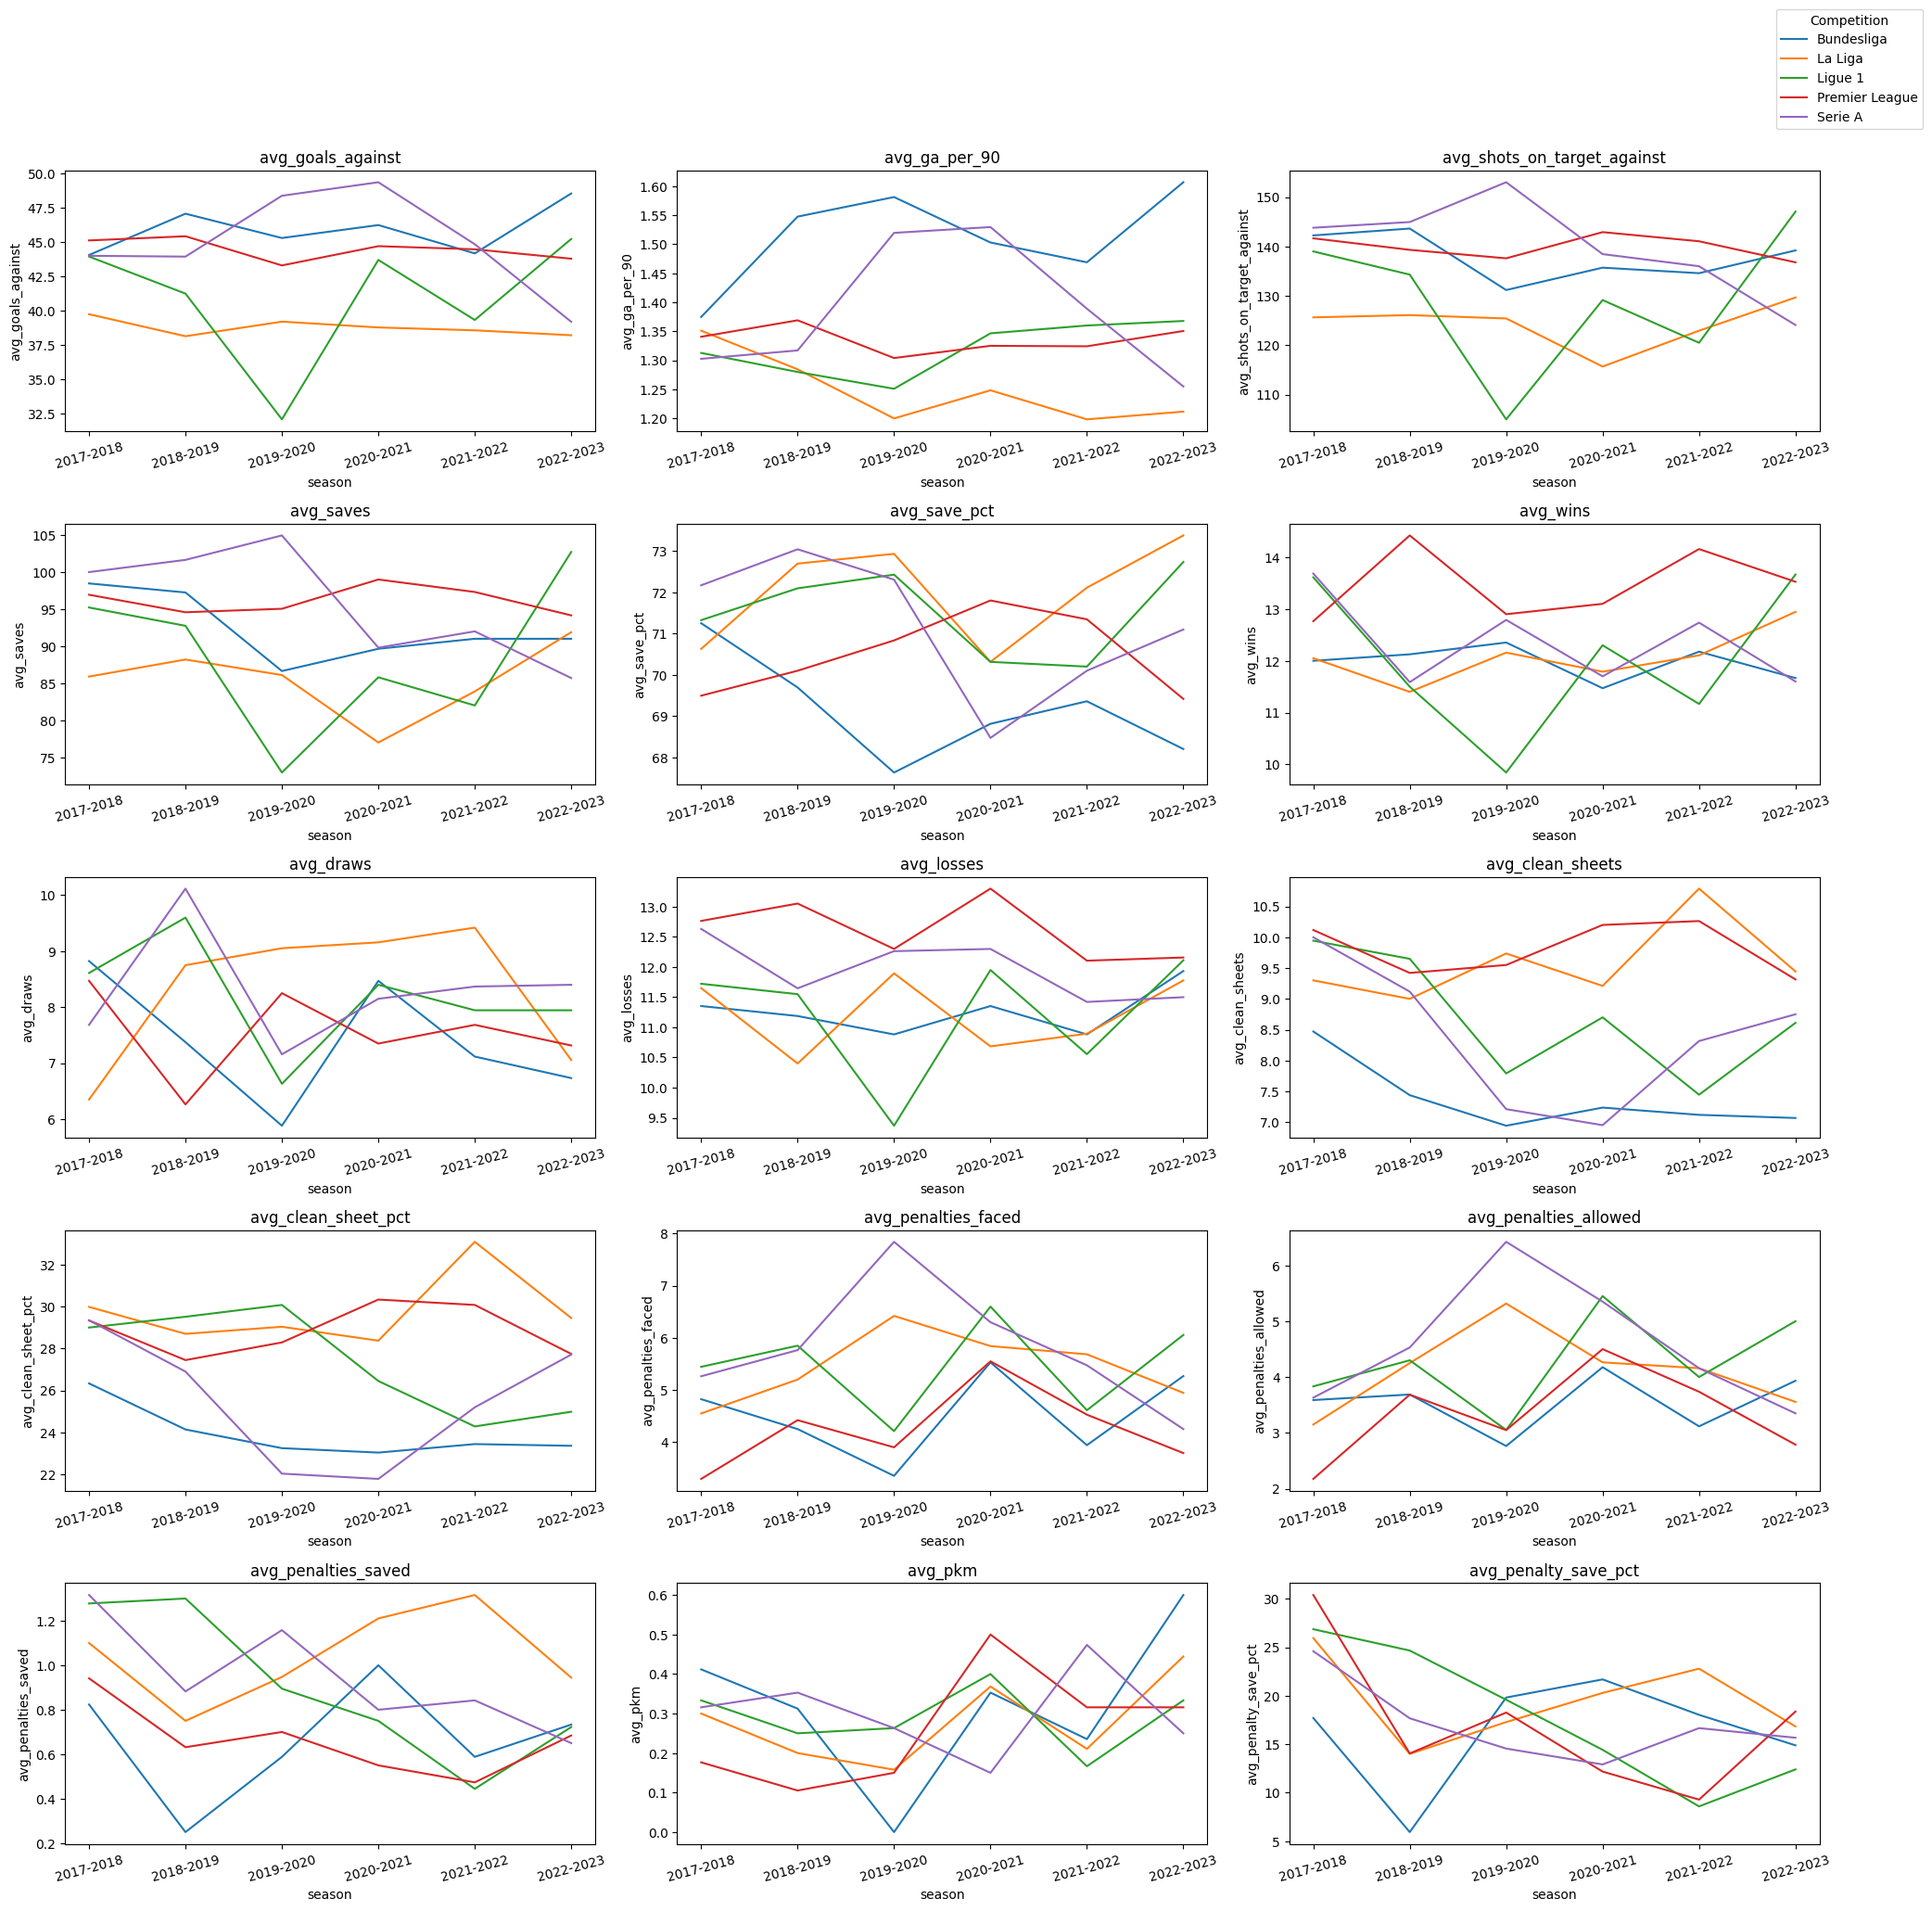

In [29]:
keeper_plots.avgs_time_series('comp', cols)

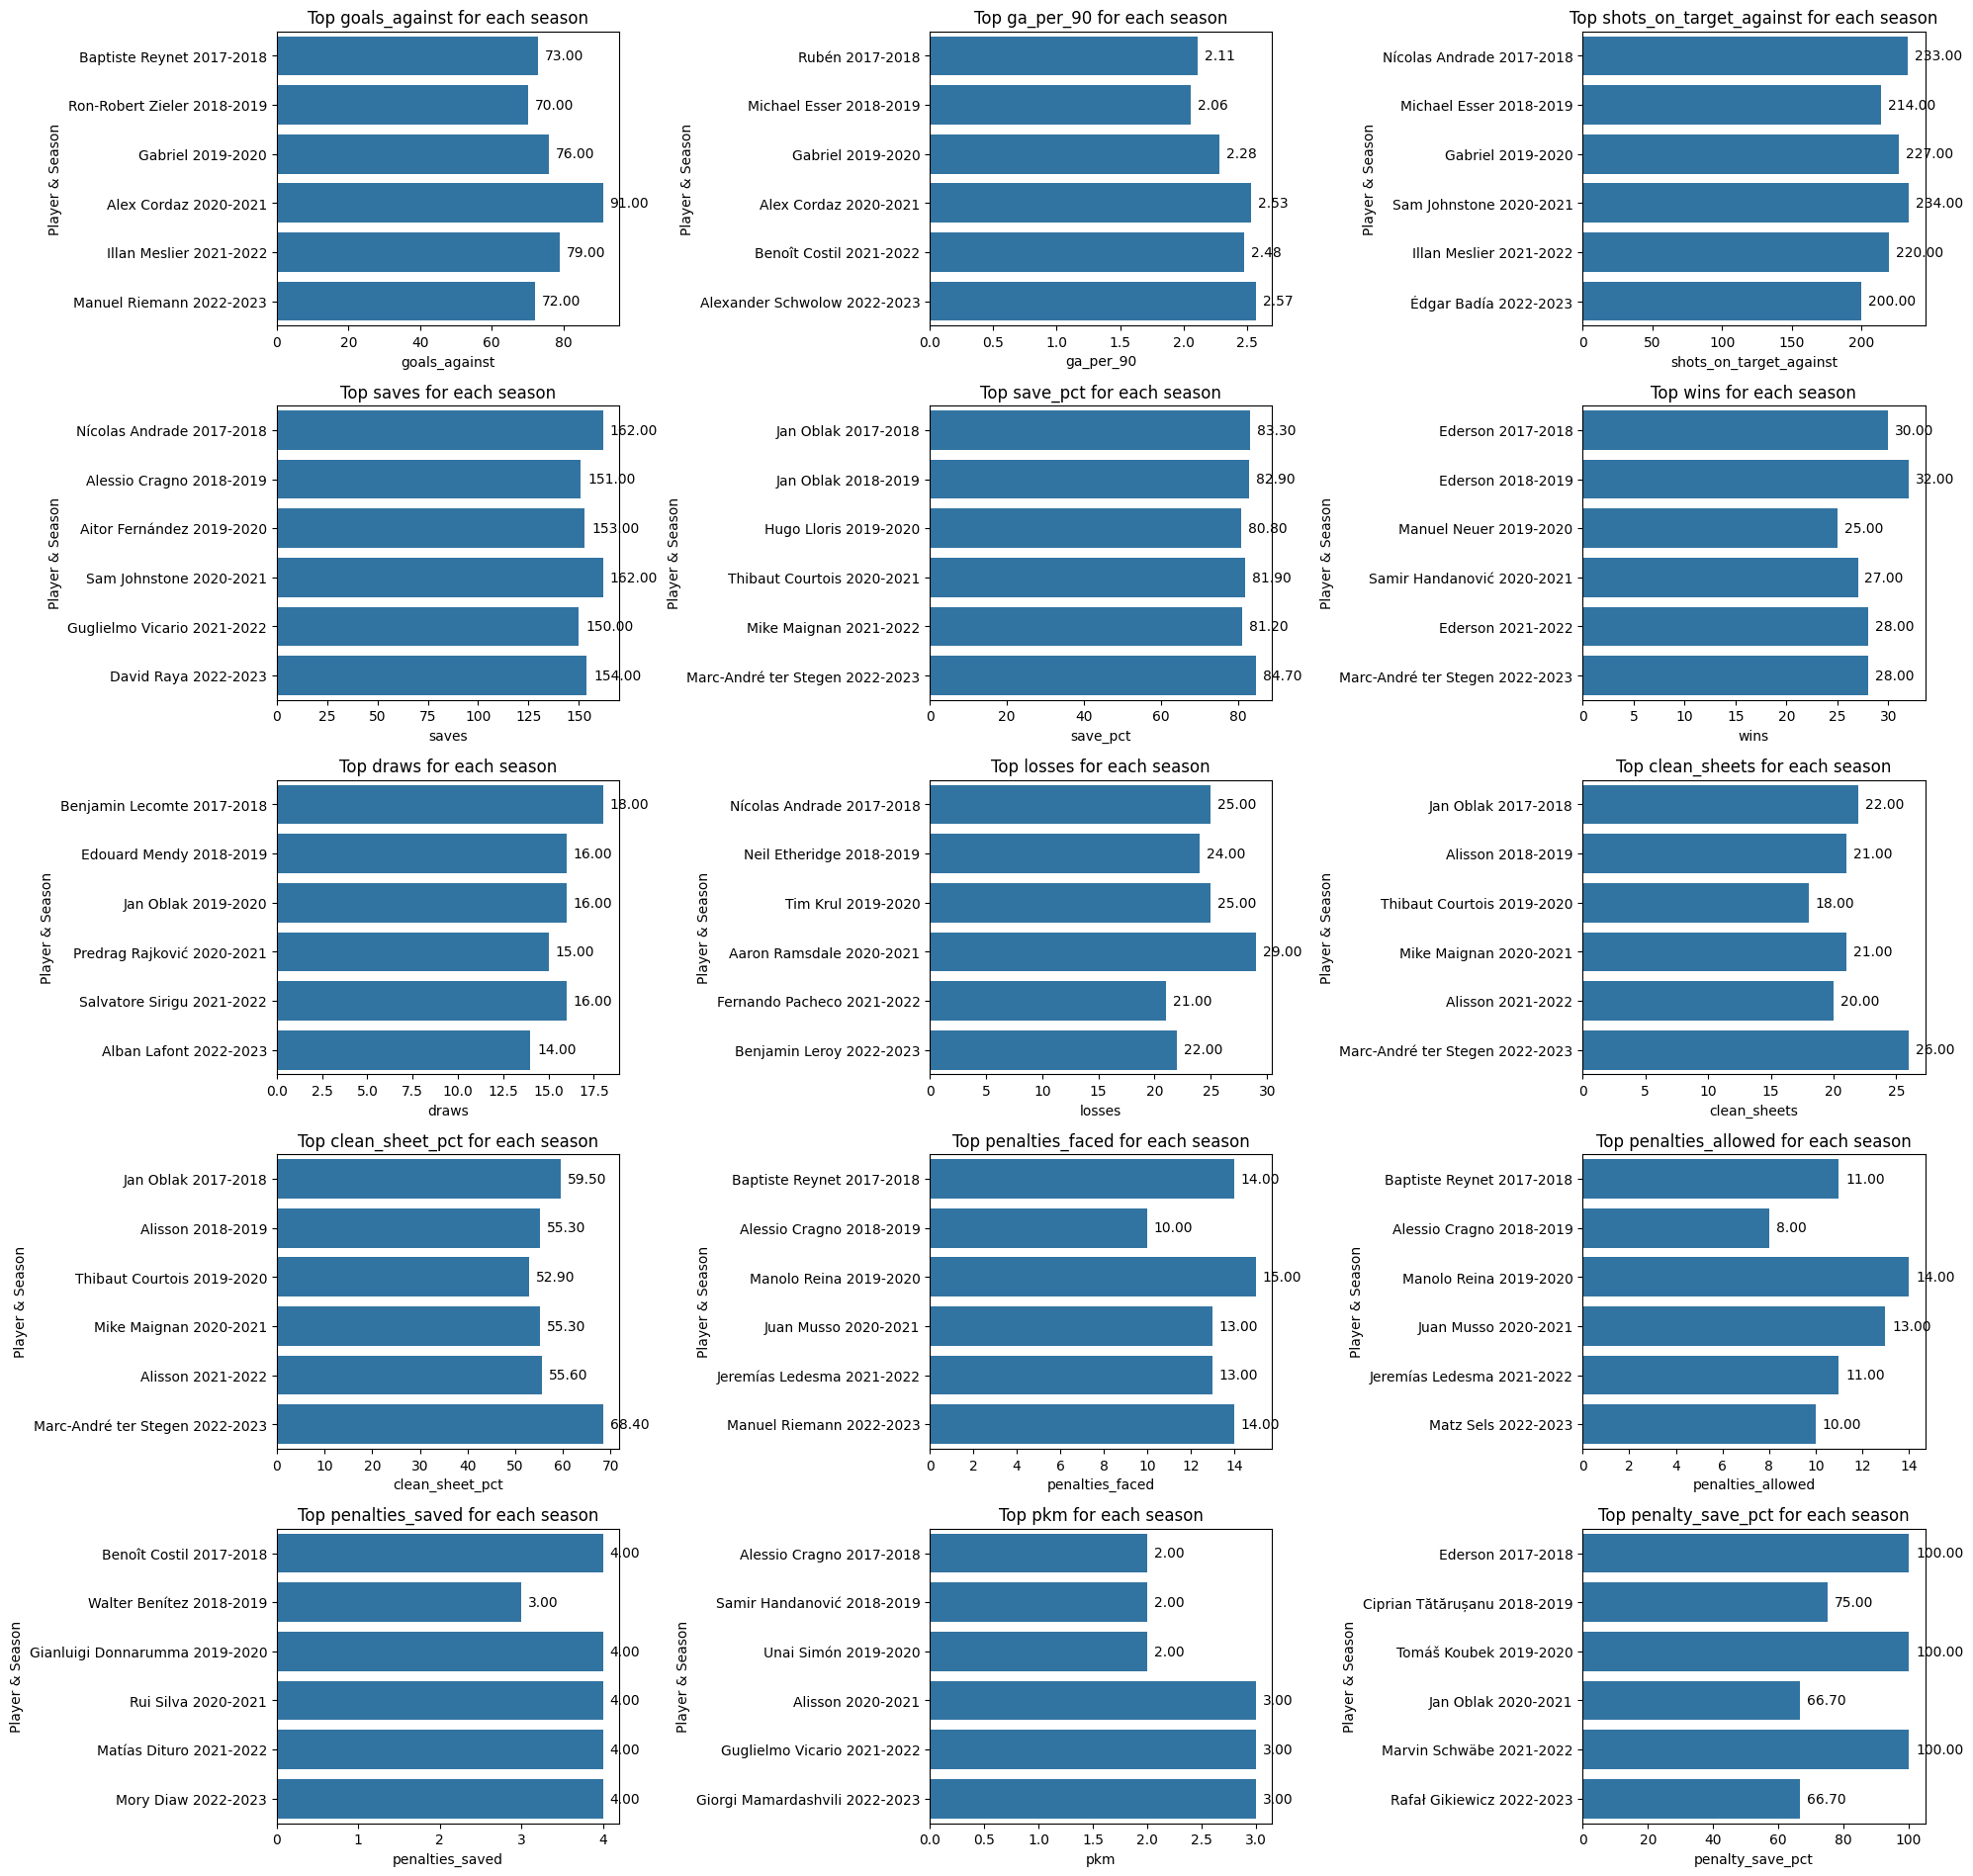

In [30]:
keeper_plots.top_per_season(cols)

In [31]:
# calculate a stat which combines save, penalty save, and clean sheet percentages

def top_stat_league_plot(df: pd.DataFrame, groupby: str, column: str):
    # for each league
    comps = df["comp"].unique()
    fig, axes = plt.subplots(2, 3, figsize=(20, 7))

    # delete empty plots
    for i in range(len(comps), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])

    for comp, ax in zip(comps, axes.flatten()):
        data = (
            df.loc[df["comp"] == comp]
            .groupby(groupby)[column]
            .mean()
            .reset_index()
        )
        sns.barplot(
            data=data.sort_values(by=column, ascending=False).head(10),
            x=column,
            y=groupby,
            palette="Blues_r",
            ax=ax,
        )
        ax.set_title(comp)
    plt.tight_layout()

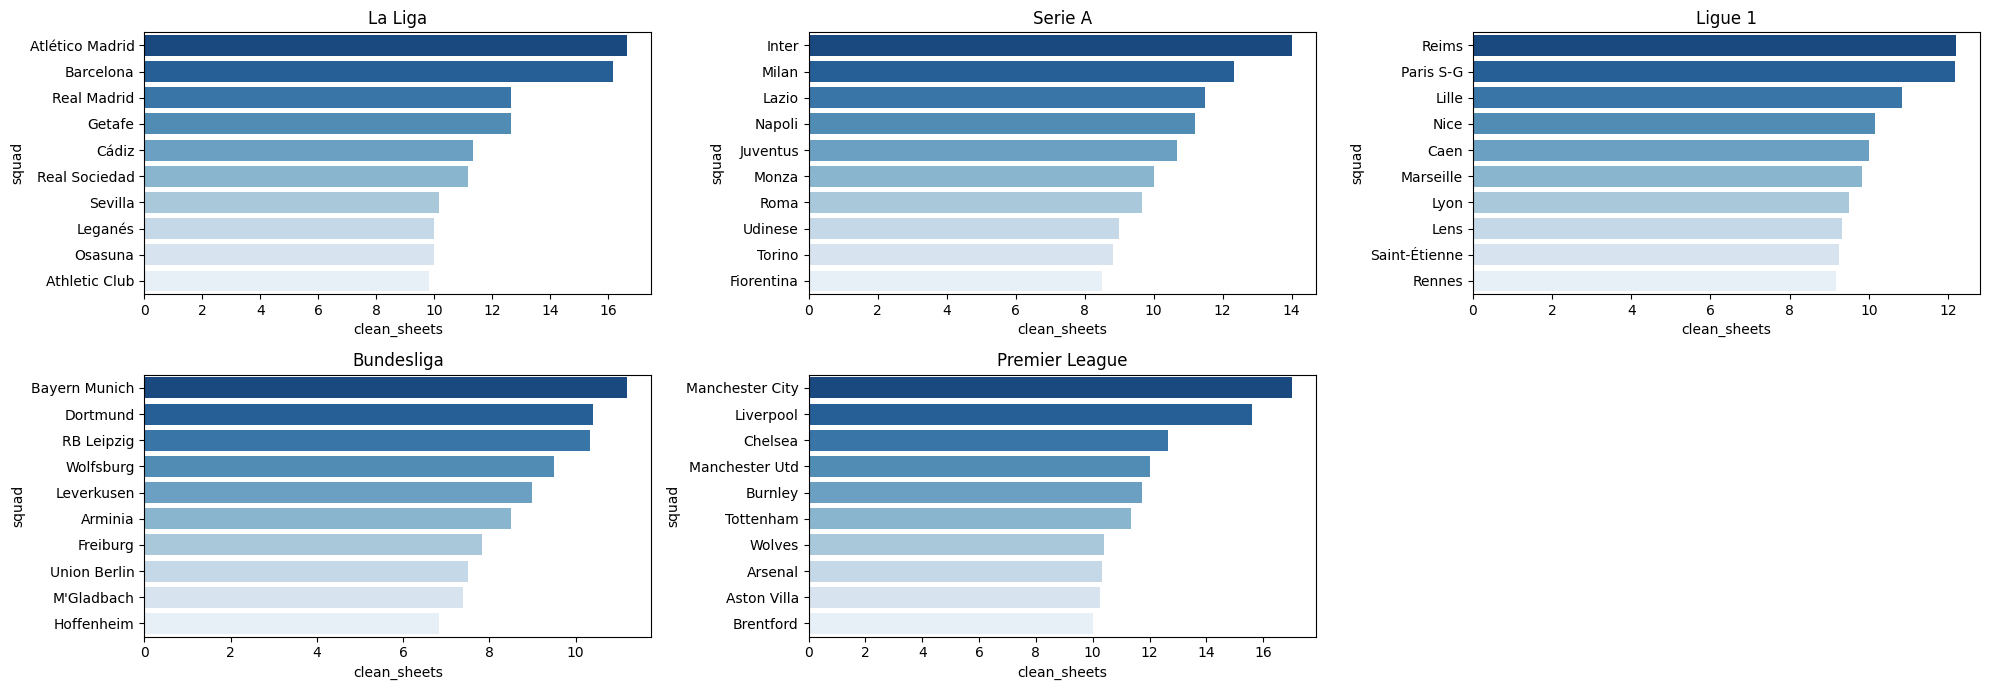

In [32]:
top_stat_league_plot(data, 'squad', 'clean_sheets')

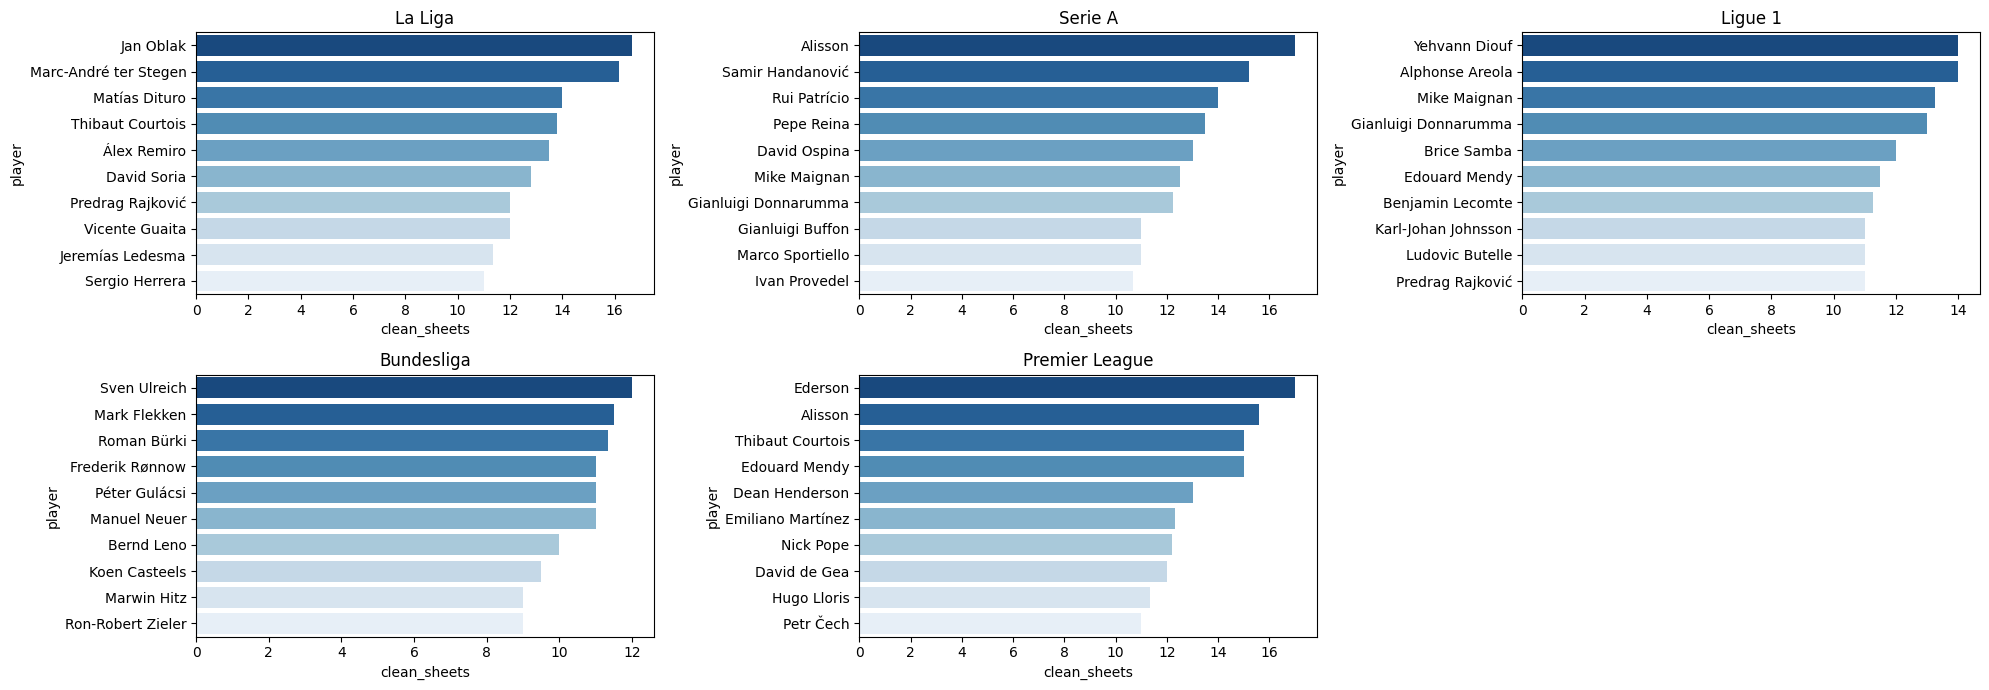

In [33]:
top_stat_league_plot(data, 'player', 'clean_sheets')

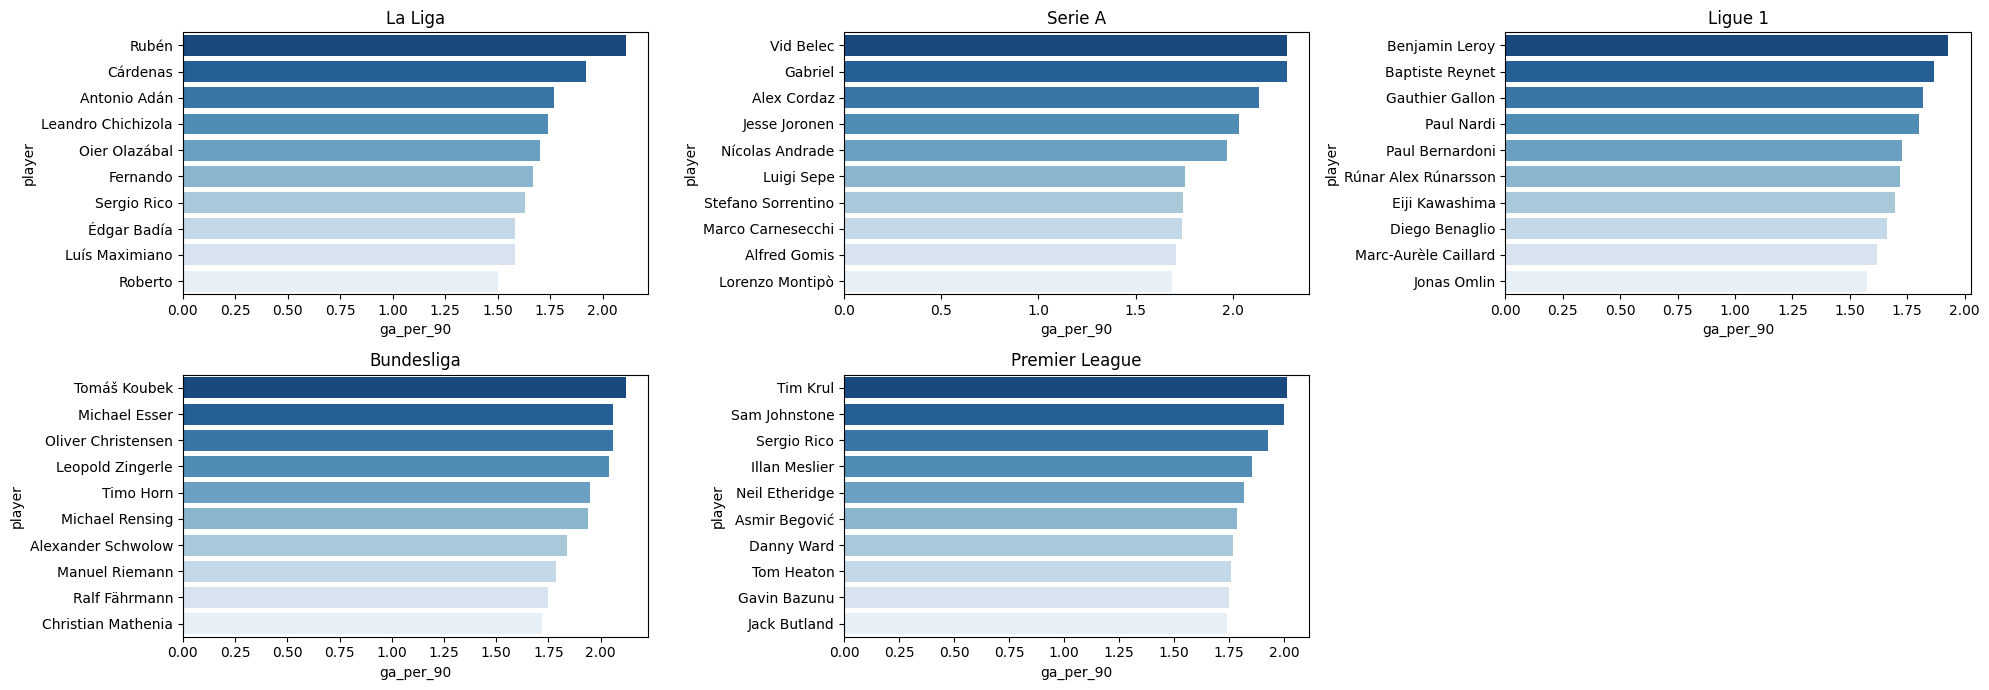

In [34]:
top_stat_league_plot(data, 'player', 'ga_per_90')

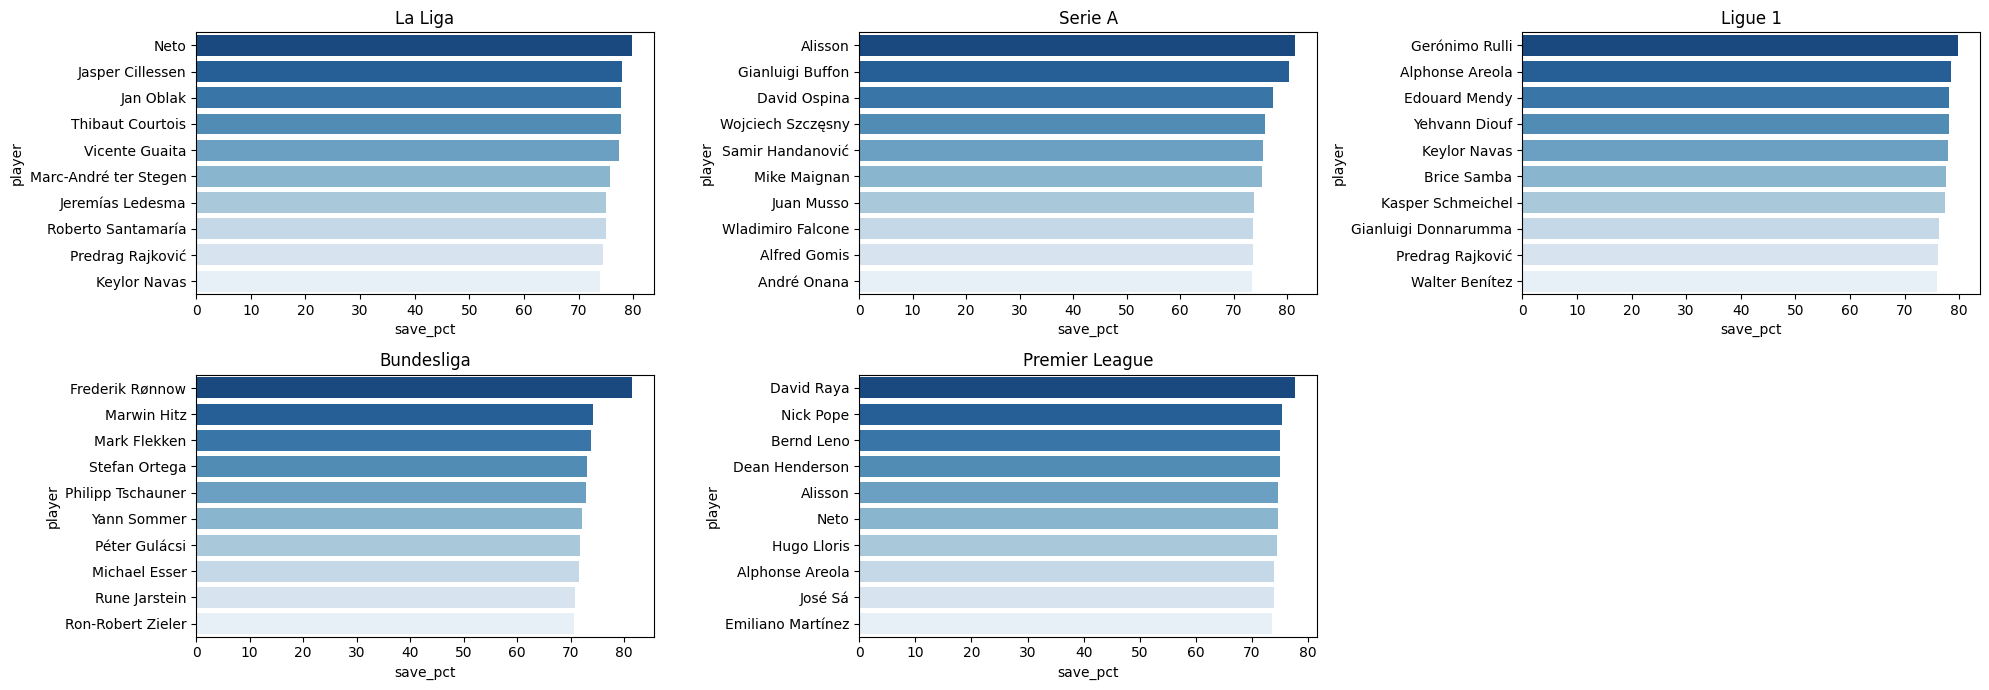

In [35]:
top_stat_league_plot(data, 'player', 'save_pct')